# Clasificacion Basica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

* ¿Cuántas imagenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [4]:
#shape train
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [5]:
# test shape
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [7]:
np.mean(X_train)

0.2860402

In [8]:
#Comprobamos la normalización

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Miramos la longuitud, contamos los números y el total es el que va en el units (en la parte de abajo)

In [42]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

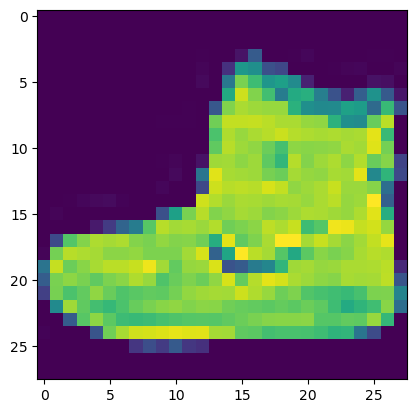

In [43]:
# plt imshow primera imagen, cmap=plt.cm.binary
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [45]:
#normaliza los pixeles para que queden entre 0 y 1

#Hecho arriba

X_train = train_images.astype("float32")/255

X_test = test_images.astype("float32")/255

In [46]:
train_images.max()

255

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

In [12]:
for i in range(25):
    print(class_names[train_labels[i]])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot
Trouser
T-shirt/top
Shirt
Coat
Dress
Trouser
Coat
Bag
Coat


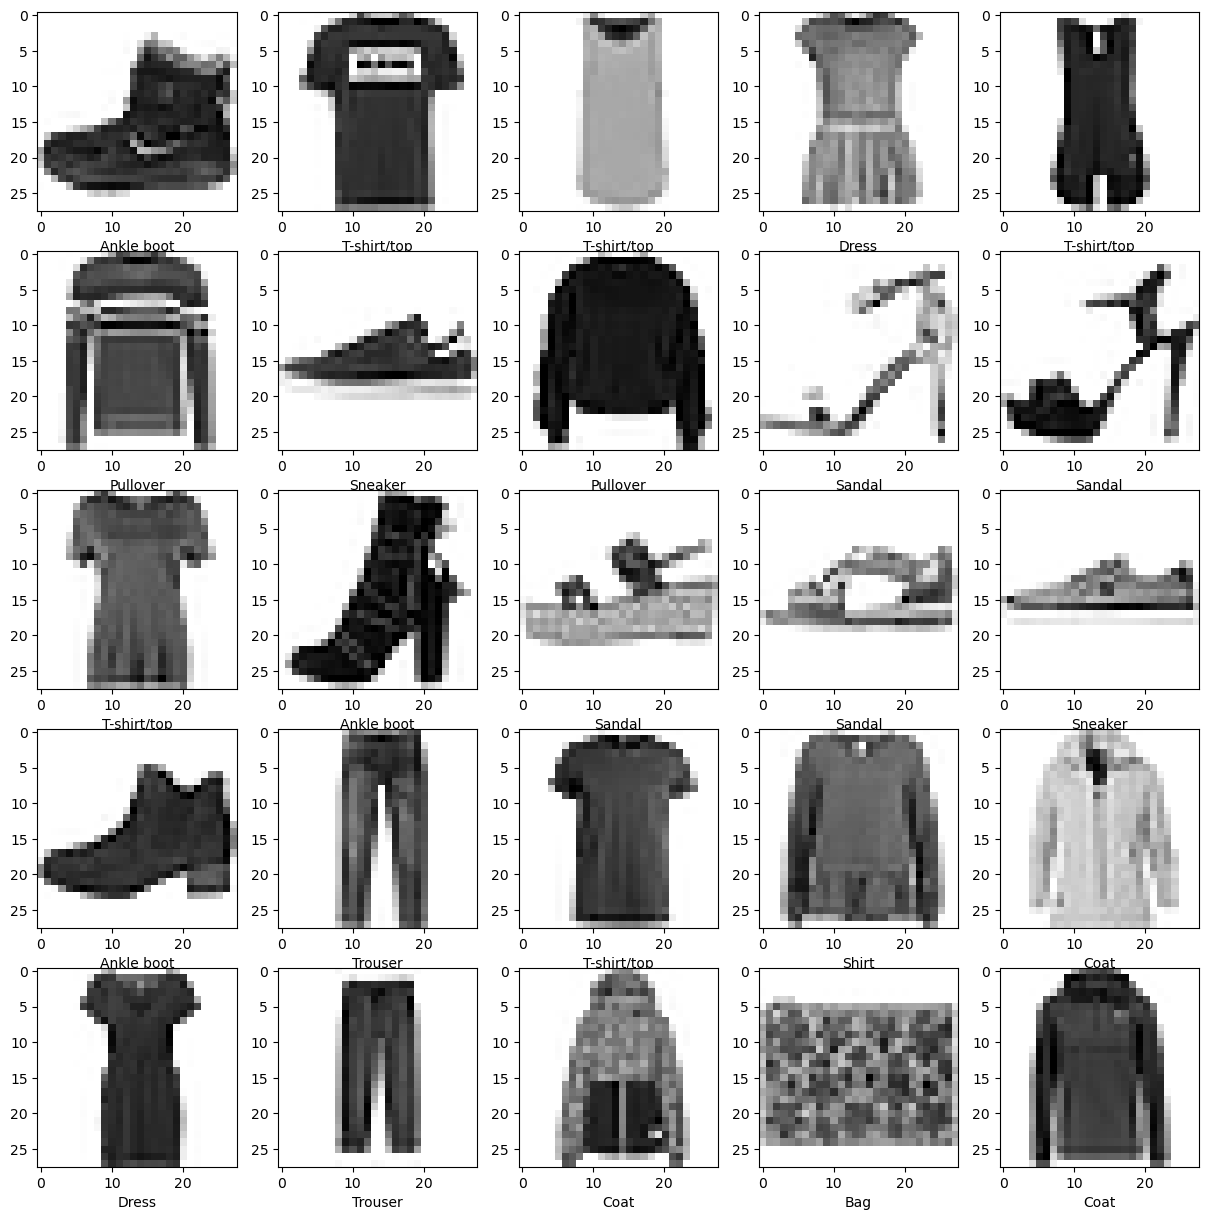

In [13]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [47]:
from tensorflow.keras.layers import  Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [48]:
# modelo secuencial
model = keras.models.Sequential() # Instanciamos el modelo

# una capa flatten porque vamos a usar capas de tipo dense
# 3 densas 128, 128 y 64

# la capa de salida con numero de nodos y loss para la tarea de clasificacion que nos atañe

In [15]:
model.add(Flatten(input_shape=(28,28))) # Primera Pseudo-capa -> de matriz a array

In [49]:
model.add(Dense(128, activation="relu")) # primera capa de activación (hidden)

In [50]:
model.add(Dropout(0.3)) 

In [18]:
model.add(Dense(128, activation="relu")) # segunda capa de activación (hidden)

In [19]:
model.add(Dropout(0.3)) 

In [20]:
model.add(Dense(64, activation="relu")) # tercera capa (hidden)

In [21]:
model.add(Dropout(0.3)) 

In [51]:
model.add(Dense(units = 10,
                        activation='softmax')) # Capa de salida (classification, 10 class)

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.

Prueba en el posterior entrenamiento varios optimizadores.

Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [23]:
# COMPILE: adam, sparse_cat y accuracy

# Equivalente
model.compile(
    optimizer = "adam", # Adam
    loss = "sparse_categorical_crossentropy", # sparse_cat vs cat --> sparse se usa cuando la y es ([5, 0, 4, ..., 5, 6, 8] como la que tenemos
    metrics = ["accuracy"] # la que mejor nos venga
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [25]:
# fit del modelo, sin validacion, 10 epocas
history = model.fit(
    X_train,
    train_labels,
    batch_size = 128,
    epochs = 10,
    validation_split = 0.1
)

Epoch 1/10


2024-12-04 09:16:59.331167: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


422/422 [==============================] - 1s 2ms/step - loss: 0.8018 - accuracy: 0.7139 - val_loss: 0.4655 - val_accuracy: 0.8303
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.5166 - accuracy: 0.8179 - val_loss: 0.4075 - val_accuracy: 0.8458
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.4574 - accuracy: 0.8394 - val_loss: 0.3722 - val_accuracy: 0.8630
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.8495 - val_loss: 0.3575 - val_accuracy: 0.8648
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.4120 - accuracy: 0.8568 - val_loss: 0.3635 - val_accuracy: 0.8665
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8606 - val_loss: 0.3533 - val_accuracy: 0.8700
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3802 - accuracy: 0.8659 - val_loss: 0.3429 - val_accuracy: 0.8735
Epoch 8/10
422/42

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [26]:
test_loss, test_acc = model.evaluate(X_test, test_labels)

313/313 [==============================] - 0s 438us/step - loss: 0.3710 - accuracy: 0.8710


In [27]:
print(test_loss)

0.3710273206233978


In [28]:
print(test_acc)

0.8709999918937683


## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [53]:
# model predict y shape de las predictions
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test)
#Esto se hace para saber donde está el número más alto de todas las predicciones
predictions=np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 554us/step


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(test_labels, predictions)

ValueError: Classification metrics can't handle a mix of multiclass and multiclass-multioutput targets

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

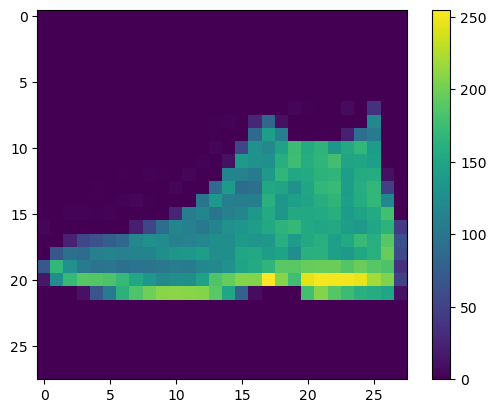

In [32]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()

*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [33]:
np.argmax(predictions[0])

0

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [34]:
test_labels[0]

9

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

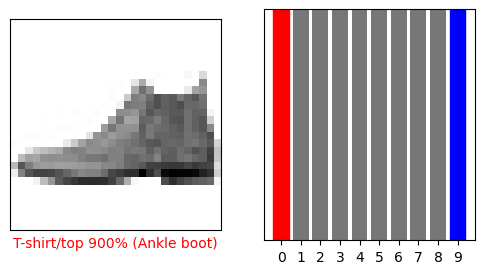

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

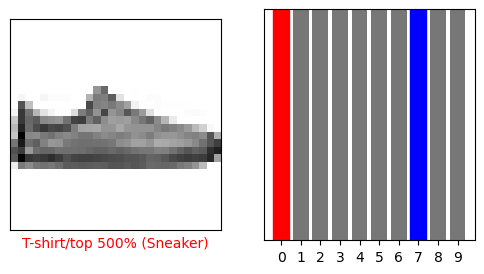

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

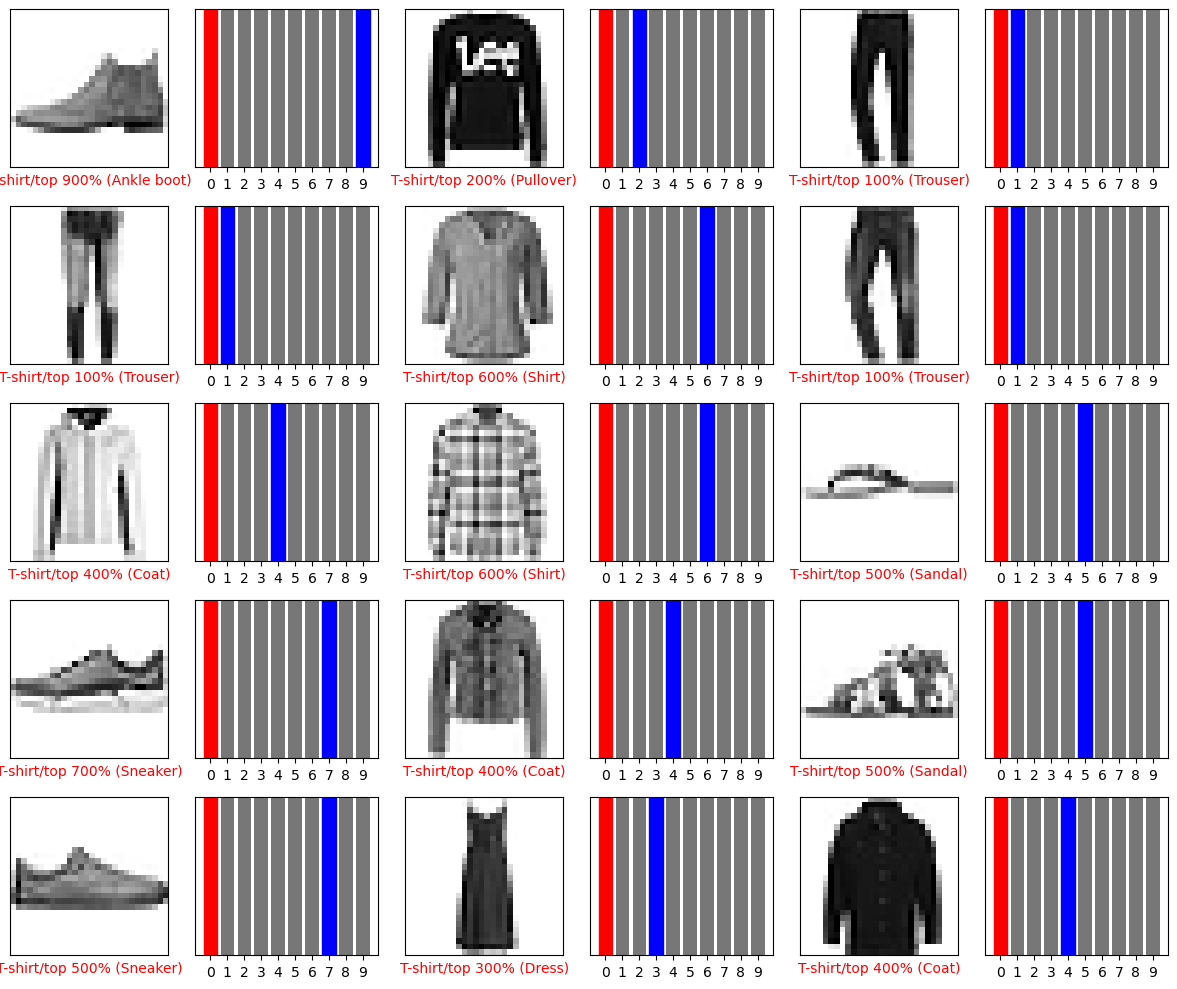

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [39]:
test_images.shape

(10000, 28, 28)

In [40]:
test_images[0:1].shape

(1, 28, 28)

In [41]:
model.predict(test_images[0:1])

1/1 [==============================] - 0s 34ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)